Clusterring Income spent using Hierarchial clusterring

Importing the basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Load dataset from local Directory

In [2]:
from google.colab import files
uploaded = files.upload()


Saving salary spent.csv to salary spent.csv


Importing the dataset

In [3]:
dataset = pd.read_csv('salary spent.csv')

Summarise of dataset 

In [4]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23               

Label Encoding

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Genre'] = label_encoder.fit_transform(dataset['Genre'])
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Dendrogram  Data visualization 

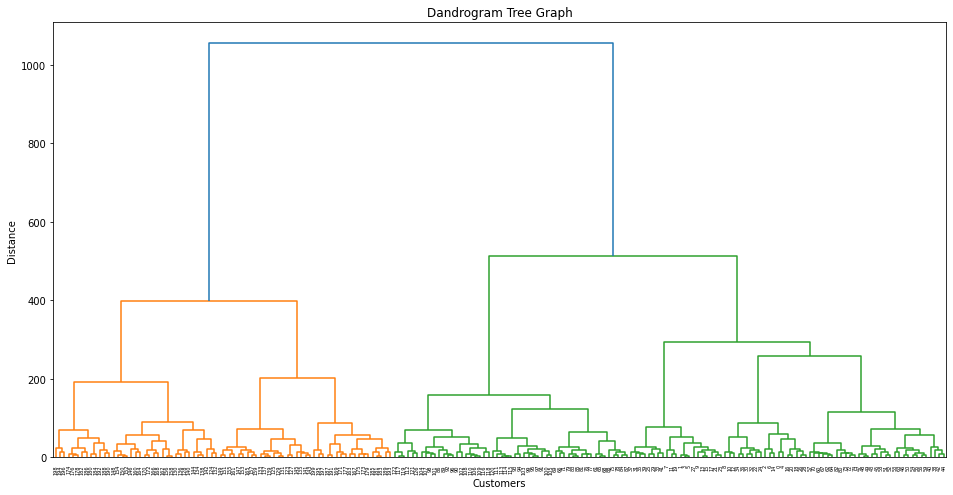

In [7]:
import scipy.cluster.hierarchy as clus

plt.figure(1,figsize = (16,8))
dendrogram = clus.dendrogram(clus.linkage(dataset,method = "ward"))

plt.title('Dandrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


Fitting the Hierarchical clustering to the dataset with n=5

In [8]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',linkage = 'average')
y_means = model.fit_predict(dataset)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Visualizing the number of clusters n=5

cluster1: Customers with medium income and Medium Spending

cluster2: Customers with High income and High  Spending

cluster3: Customers with Low income and Low  Spending

cluster4: Customers with High income and Low Spending

cluster5: Customers with low income and High Spending

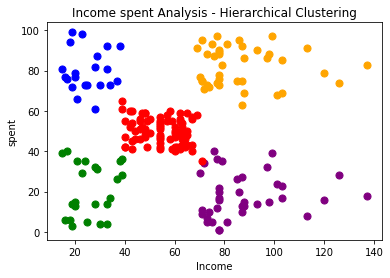

In [9]:
X = dataset.iloc[:,[3,4]].values
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label = 'Cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label = 'Cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label = 'Cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label = 'Cluster 4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label = 'Cluster 5')
plt.title('Income spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('spent')
plt.show()
